## 1
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

имтортируем необходимые библиотеки,данные, функции исследуемых алгоритмов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return w

# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return w

построим графики зависимости ошибки от количества итераций для алгоритма gb и sgb

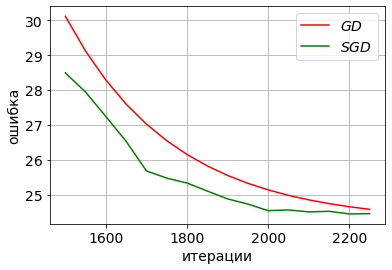

In [47]:
iterations = list(range(1500,2300,50))

alpha = 1e-3

#переменные для храниения данный об ошибках и весах
err_GD = []
err_SGD = []
data_w_gd = []
data_w_sgd = []

for iteration in iterations:
    w_GD = eval_GD(X_,y_,iteration,alpha)
    w_SGD = eval_SGD(X_,y_,iteration,alpha)
    
    data_w_gd.append(list(w_GD))
    data_w_sgd.append(list(w_SGD))
    
    y_pred_GD = np.dot(X_, w_GD)
    y_pred_SGD = np.dot(X_, w_SGD)

    err_GD.append(calc_mse(y_, y_pred_GD))
    err_SGD.append(calc_mse(y_, y_pred_SGD))

plt.plot(iterations,  err_GD, color='red',label=r'$GD$')
plt.plot(iterations,  err_SGD, color='green',label=r'$SGD$')
plt.xlabel('итерации')
plt.ylabel('ошибка')
plt.grid()
plt.legend();

In [48]:
print(f'w_GD = {w_GD}\nw_SGD = {w_SGD}\ncoef = {coef}')

w_GD = [40.26490253  6.64482477]
w_SGD = [40.42353015  6.50506742]
coef = [40.71064891  6.60098441]


на графике выше видно что скорость сходимости метода sgd выше чем у gd,
далее посмотрим как меняються веса при увеличении количества итераций

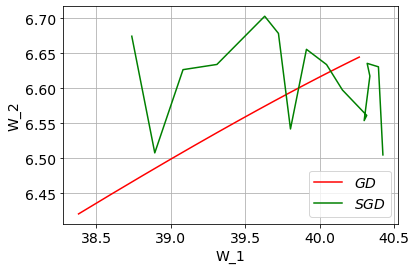

In [49]:
data_w_gd = np.array(data_w_gd)
data_w_sgd = np.array(data_w_sgd)

plt.plot(data_w_gd.T[0],  data_w_gd.T[1], color='red',label=r'$GD$')
plt.plot(data_w_sgd.T[0],  data_w_sgd.T[1], color='green',label=r'$SGD$')
plt.xlabel('W_1')
plt.ylabel('W_2')
plt.grid()
plt.legend();

здесь мы видим что веса gb поднимаються по прямой а веса sdg по кривой(это скорее всего из за случайного индекса для расчета весов)